# Librerias utilizadas

In [2]:
#Procesamiento
import pandas as pd
import numpy as np
import os
import datetime as dt
#Valores nulos
import missingno as msno
#Graficas
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
ruta = '/content/drive/MyDrive/DATASET'
os.listdir(ruta)

['dataset.ipynb']

# Leer dataset y mostrar las primeros 5 filas

In [8]:
dataset = pd.read_csv(ruta + '/Dataset_Talento_DESARROLLO.csv')
dataset.head()

timestamp   turno operador_id maquina_id producto_id  \
0  2023-01-01 00:00:00   Noche       OP_16        M_8        P_14   
1  2023-01-01 01:00:00  Mañana       OP_18        M_8        P_12   
2  2023-01-01 02:00:00   Noche        OP_5        M_7        P_14   
3  2023-01-01 03:00:00   Noche        OP_4        M_6        P_15   
4  2023-01-01 04:00:00  Mañana       OP_13        M_6         P_7   

   temperatura  vibración    humedad  tiempo_ciclo fallo_detectado tipo_fallo  \
0    74.200401        NaN  45.209387    106.356684              No        NaN   
1    85.886727   0.481294  52.623286    106.147220              Sí  Eléctrico   
2    81.293588   0.446638  48.538203    122.517733              No        NaN   
3    75.697975   0.576969  55.597781    123.641235              No        NaN   
4    69.887504   0.716240  63.837428    126.276992              No        NaN   

   cantidad_producida  unidades_defectuosas  eficiencia_porcentual  \
0                 108                     3              87.021704   
1                  86                     2              81.200758   
2                 103                     0              79.104477   
3                 104                     2              84.176537   
4                 119                     1              93.535084   

   consumo_energia  paradas_programadas  paradas_imprevistas     observaciones  
0        13.131580                    0                    1               NaN  
1        13.348221                    0                    0               NaN  
2        15.461715                    3                    0  Operación normal  
3        16.156453                    4                    0               NaN  
4        12.573939                    0                    0  Operación normal

# Registros totales y columnas:

In [9]:
dataset.shape

(6000, 18)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              6000 non-null   object 
 1   turno                  6000 non-null   object 
 2   operador_id            6000 non-null   object 
 3   maquina_id             6000 non-null   object 
 4   producto_id            6000 non-null   object 
 5   temperatura            5820 non-null   float64
 6   vibración              5820 non-null   float64
 7   humedad                5820 non-null   float64
 8   tiempo_ciclo           5820 non-null   float64
 9   fallo_detectado        6000 non-null   object 
 10  tipo_fallo             599 non-null    object 
 11  cantidad_producida     6000 non-null   int64  
 12  unidades_defectuosas   6000 non-null   int64  
 13  eficiencia_porcentual  5820 non-null   float64
 14  consumo_energia        5820 non-null   float64
 15  para

# Lista de columnas:

In [11]:
dataset.columns

Index(['timestamp', 'turno', 'operador_id', 'maquina_id', 'producto_id',
       'temperatura', 'vibración', 'humedad', 'tiempo_ciclo',
       'fallo_detectado', 'tipo_fallo', 'cantidad_producida',
       'unidades_defectuosas', 'eficiencia_porcentual', 'consumo_energia',
       'paradas_programadas', 'paradas_imprevistas', 'observaciones'],
      dtype='object')

# Limpieza de datos:


Para la limpieza del dataset vamos a tener en cuenta los siguientes aspectos:

Verificar nulidad de datos y datos faltates en celdas (Los datos deben ser 6000).


1. Verificar nulidad de datos y datos faltates en celdas (Los datos deben ser 6000).
2. Columnas irrelevantes.
3. Filas repetidas.
4. Valores extremos (outliers) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos.
5. Errores tipograficos en las variables categoricas.


# 1) Nulidad de los datos

In [14]:
Missing_values = dataset.isnull().sum()
Missing_values

timestamp                   0
turno                       0
operador_id                 0
maquina_id                  0
producto_id                 0
temperatura               180
vibración                 180
humedad                   180
tiempo_ciclo              180
fallo_detectado             0
tipo_fallo               5401
cantidad_producida          0
unidades_defectuosas        0
eficiencia_porcentual     180
consumo_energia           180
paradas_programadas         0
paradas_imprevistas         0
observaciones            4226
dtype: int64

Antes de continuar con el analisis de los datos nulos, vemos que hay dos columnas que en este momento no son de nuestro interes para el modelamiento de nuestras predicciones, los cuales son tipo_fallo y observaciones.

In [46]:
# Eliminar la columna 'tipo_fallo y observaciones'
dataset.drop('tipo_fallo', axis=1, inplace=True) #axis=1 (columna)
dataset.drop('observaciones', axis=1, inplace=True) #axis=1 (columna)

# Verificamos que la columna ha sido eliminada
print(dataset.columns)

Index(['timestamp', 'turno', 'operador_id', 'maquina_id', 'producto_id',
       'temperatura', 'vibración', 'humedad', 'tiempo_ciclo',
       'fallo_detectado', 'cantidad_producida', 'unidades_defectuosas',
       'eficiencia_porcentual', 'consumo_energia', 'paradas_programadas',
       'paradas_imprevistas'],
      dtype='object')


In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              6000 non-null   object 
 1   turno                  6000 non-null   object 
 2   operador_id            6000 non-null   object 
 3   maquina_id             6000 non-null   object 
 4   producto_id            6000 non-null   object 
 5   temperatura            5820 non-null   float64
 6   vibración              5820 non-null   float64
 7   humedad                5820 non-null   float64
 8   tiempo_ciclo           5820 non-null   float64
 9   fallo_detectado        6000 non-null   object 
 10  cantidad_producida     6000 non-null   int64  
 11  unidades_defectuosas   6000 non-null   int64  
 12  eficiencia_porcentual  5820 non-null   float64
 13  consumo_energia        5820 non-null   float64
 14  paradas_programadas    6000 non-null   int64  
 15  para

# Total de celdas

In [54]:
Missing_values = dataset.isnull().sum()
Missing_values

timestamp                  0
turno                      0
operador_id                0
maquina_id                 0
producto_id                0
temperatura              180
vibración                180
humedad                  180
tiempo_ciclo             180
fallo_detectado            0
cantidad_producida         0
unidades_defectuosas       0
eficiencia_porcentual    180
consumo_energia          180
paradas_programadas        0
paradas_imprevistas        0
dtype: int64

In [55]:
total_cells = np.prod(dataset.shape)
total_cells


np.int64(96000)

In [56]:
total_missing = Missing_values.sum()
total_missing

np.int64(1080)

In [57]:
(total_missing/total_cells)*100

np.float64(1.125)

# Eliminar datos nulos:
Como podemos ver los datos faltantes solo representan el 1,12% del total, lo cual es un porcentaje muy bajo, en este caso tenemos dos opciones o reemplazar los datos por la media del valor de surespectiva categoria, o la otra y la mas optima en este caso, seria la de eliminar dichos datos ya que no representan una cantidad significativa dentro de su categoria

In [58]:
dataset.dropna(inplace=True) #dropna eliminar valores faltantes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4991 entries, 1 to 5999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              4991 non-null   object 
 1   turno                  4991 non-null   object 
 2   operador_id            4991 non-null   object 
 3   maquina_id             4991 non-null   object 
 4   producto_id            4991 non-null   object 
 5   temperatura            4991 non-null   float64
 6   vibración              4991 non-null   float64
 7   humedad                4991 non-null   float64
 8   tiempo_ciclo           4991 non-null   float64
 9   fallo_detectado        4991 non-null   object 
 10  cantidad_producida     4991 non-null   int64  
 11  unidades_defectuosas   4991 non-null   int64  
 12  eficiencia_porcentual  4991 non-null   float64
 13  consumo_energia        4991 non-null   float64
 14  paradas_programadas    4991 non-null   int64  
 15  paradas_i

<Axes: >

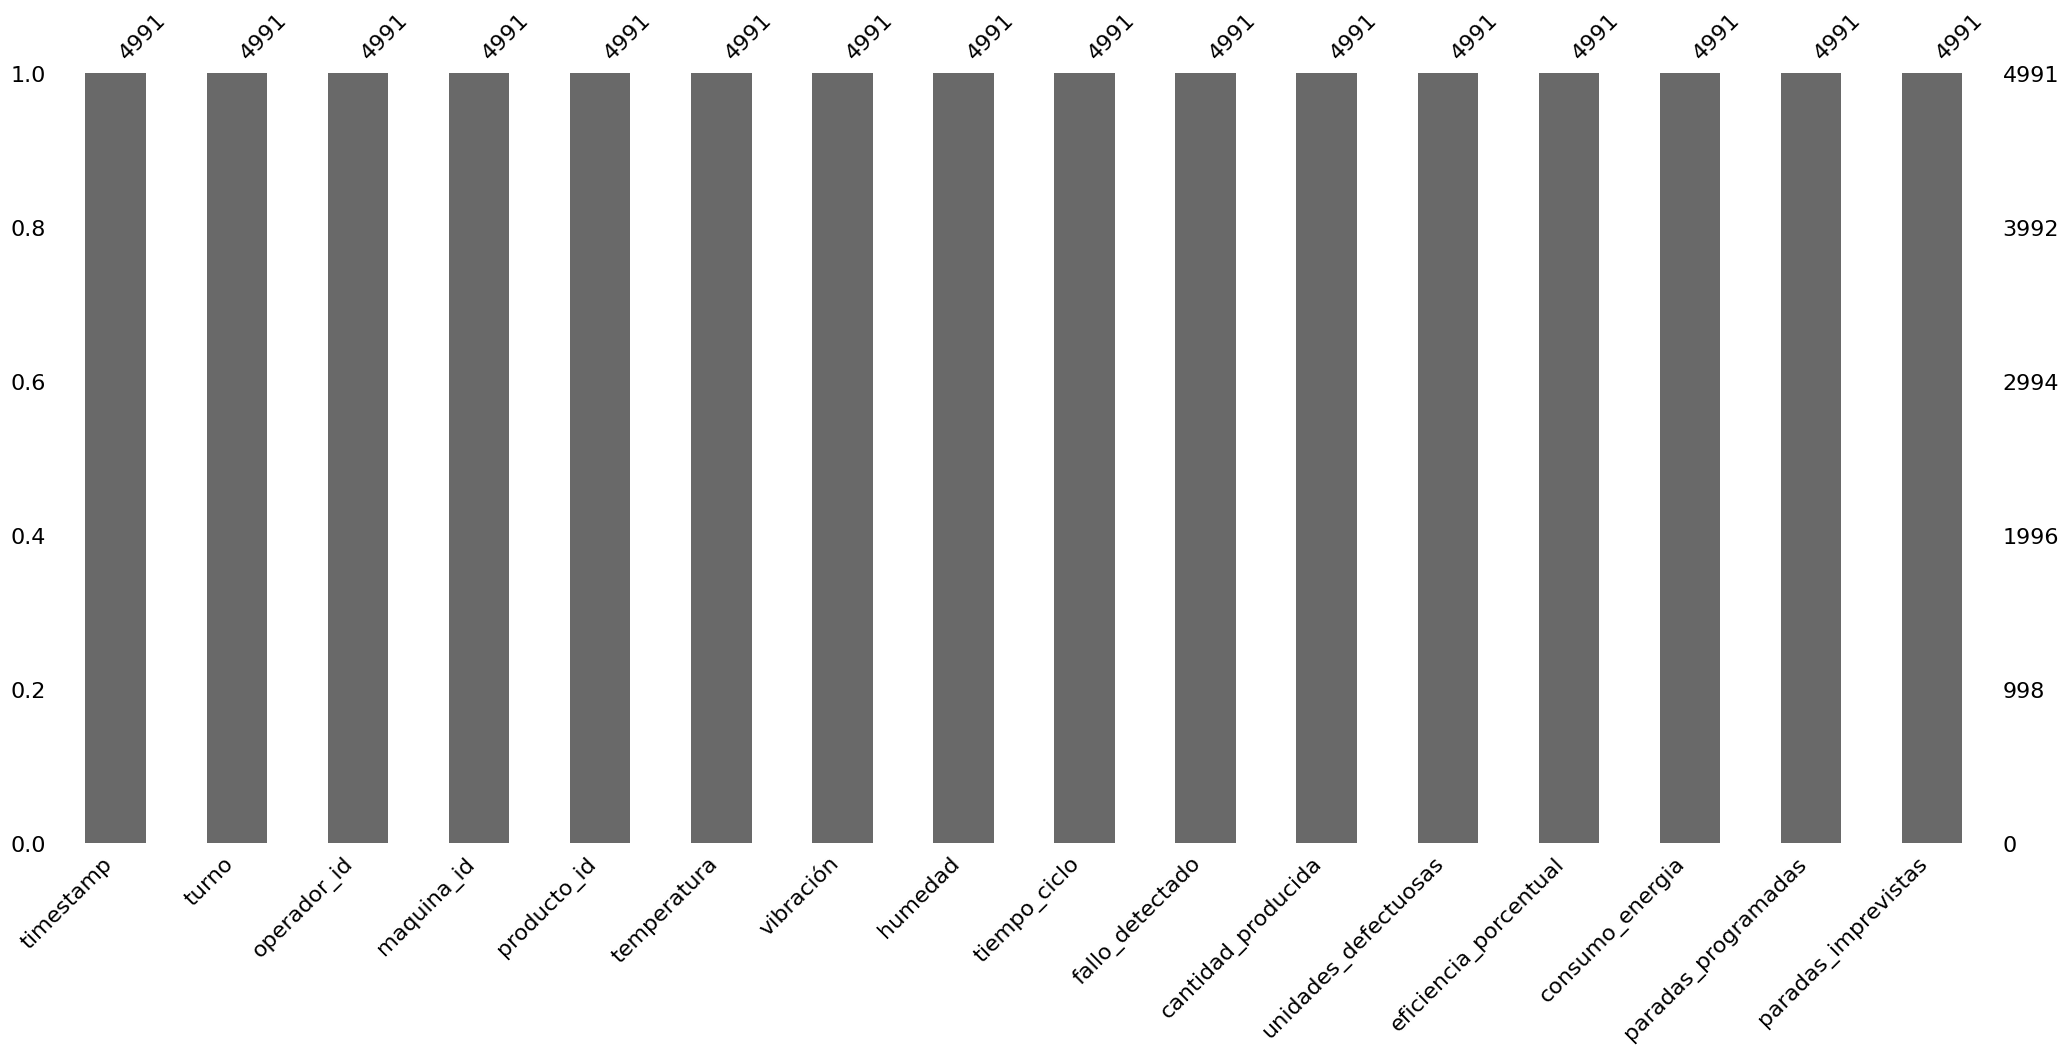

In [60]:
msno.bar(dataset)

Ya eliminamos las filas que tenian datos nulos, ahora todas las categorias de nuestro dataset tienen la misma cantidad de datos. Como podemos ver en el grafico cada columna quedo con 4991 datos y el lado izquierdo en el eje y podemos ver valores de 0.0 a 1.0, todas las columnas suben hasta 1.0 lo cual es igual a 100%, esto signfica que estan presentes el 100% de los datos en dicha columna.

# 2) Eliminar columnas irrelevantes
En esta parte ya eliminamos dos que no necesitabamos, pero entonces vamos a proceder analizando las columnas categoricas y sus subniveles, tambien analizaremos las columnas numericas.

# 2.1. analizaremos si hay columnas categoricas que contengan un solo nivel.

In [61]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['timestamp', 'turno', 'operador_id', 'maquina_id', 'producto_id',
       'temperatura', 'vibración', 'humedad', 'tiempo_ciclo',
       'fallo_detectado', 'cantidad_producida',
       'unidades_defectuosas', 'eficiencia_porcentual', 'consumo_energia',
       'paradas_programadas', 'paradas_imprevistas']

for col in cols_cat:
  print(f'Columna {col}: {dataset[col].nunique()} subniveles') #nunique valores unicos(subniveles)

Columna timestamp: 4991 subniveles
Columna turno: 3 subniveles
Columna operador_id: 20 subniveles
Columna maquina_id: 10 subniveles
Columna producto_id: 15 subniveles
Columna temperatura: 4991 subniveles
Columna vibración: 4991 subniveles
Columna humedad: 4991 subniveles
Columna tiempo_ciclo: 4991 subniveles
Columna fallo_detectado: 2 subniveles
Columna cantidad_producida: 67 subniveles
Columna unidades_defectuosas: 10 subniveles
Columna eficiencia_porcentual: 4991 subniveles
Columna consumo_energia: 4991 subniveles
Columna paradas_programadas: 7 subniveles
Columna paradas_imprevistas: 5 subniveles


Como vemos todas las columnas categoricas tiene mas de un subnivel, esto quiere decir que no hay ninguna columna en el cual todos los valores de esta sean el mismo, por lo tanto no eliminaremos ninguna columna de estas.

# 2.3. Ahora analizaremos si hay columnas numericas que contengan solo un valor.

In [63]:
dataset.describe()

temperatura    vibración      humedad  tiempo_ciclo  \
count  4991.000000  4991.000000  4991.000000   4991.000000   
mean     75.015955     0.502592    44.905026    119.936776   
std       4.943320     0.100126     9.957848     19.970646   
min      57.900924     0.052148     0.345502     53.707495   
25%      71.670308     0.435240    38.262296    106.592516   
50%      74.971892     0.503905    44.661717    120.045470   
75%      78.322270     0.572456    51.485631    133.023848   
max      95.739475     0.832678    81.402316    201.989007   

       cantidad_producida  unidades_defectuosas  eficiencia_porcentual  \
count         4991.000000           4991.000000            4991.000000   
mean           100.099179              2.009016              84.947788   
std             10.173248              1.409430               5.046368   
min             65.000000              0.000000              67.442964   
25%             93.000000              1.000000              81.512782   
50%            100.000000              2.000000              85.036497   
75%            107.000000              3.000000              88.377385   
max            137.000000             10.000000             102.024829   

       consumo_energia  paradas_programadas  paradas_imprevistas  
count      4991.000000          4991.000000          4991.000000  
mean         15.110711             0.987377             0.494490  
std           3.010546             0.993789             0.689398  
min           3.693371             0.000000             0.000000  
25%          13.079537             0.000000             0.000000  
50%          15.087024             1.000000             0.000000  
75%          17.174199             2.000000             1.000000  
max          26.699891             6.000000             4.000000

Nos fijamos en los valores de la fila std y vemos si son diferentes a cero, como vemos que todos son diferentes a cero, eso significa que no tienen un unico valor, hay algunos que estan muy cerca a cero pero son importantes para nuestro futuro modelo de prediccion. Con lo anterior en cuenta sabemos que no debemos eliminar ninguna columna numerica.

3. ANALIZAR SI HAY FILAS REPETIDAS

In [66]:
print(f'Tamaño del set previo a eliminar las filas repetidas: {dataset.shape}')
dataset.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {dataset.shape}')

Tamaño del set previo a eliminar las filas repetidas: (4991, 16)
Tamaño del set después de eliminar las filas repetidas: (4991, 16)


Como podemos ver no se elimino ningun registro, esto quiere decir que no habia ninguna fila repetida, ya que para que se elimine una fila una tiene que ser la replica de la otra es decir, concordar con cada uno de los datos de la otra.

# 4. Analizar si hay Outliers en las variables numéricas

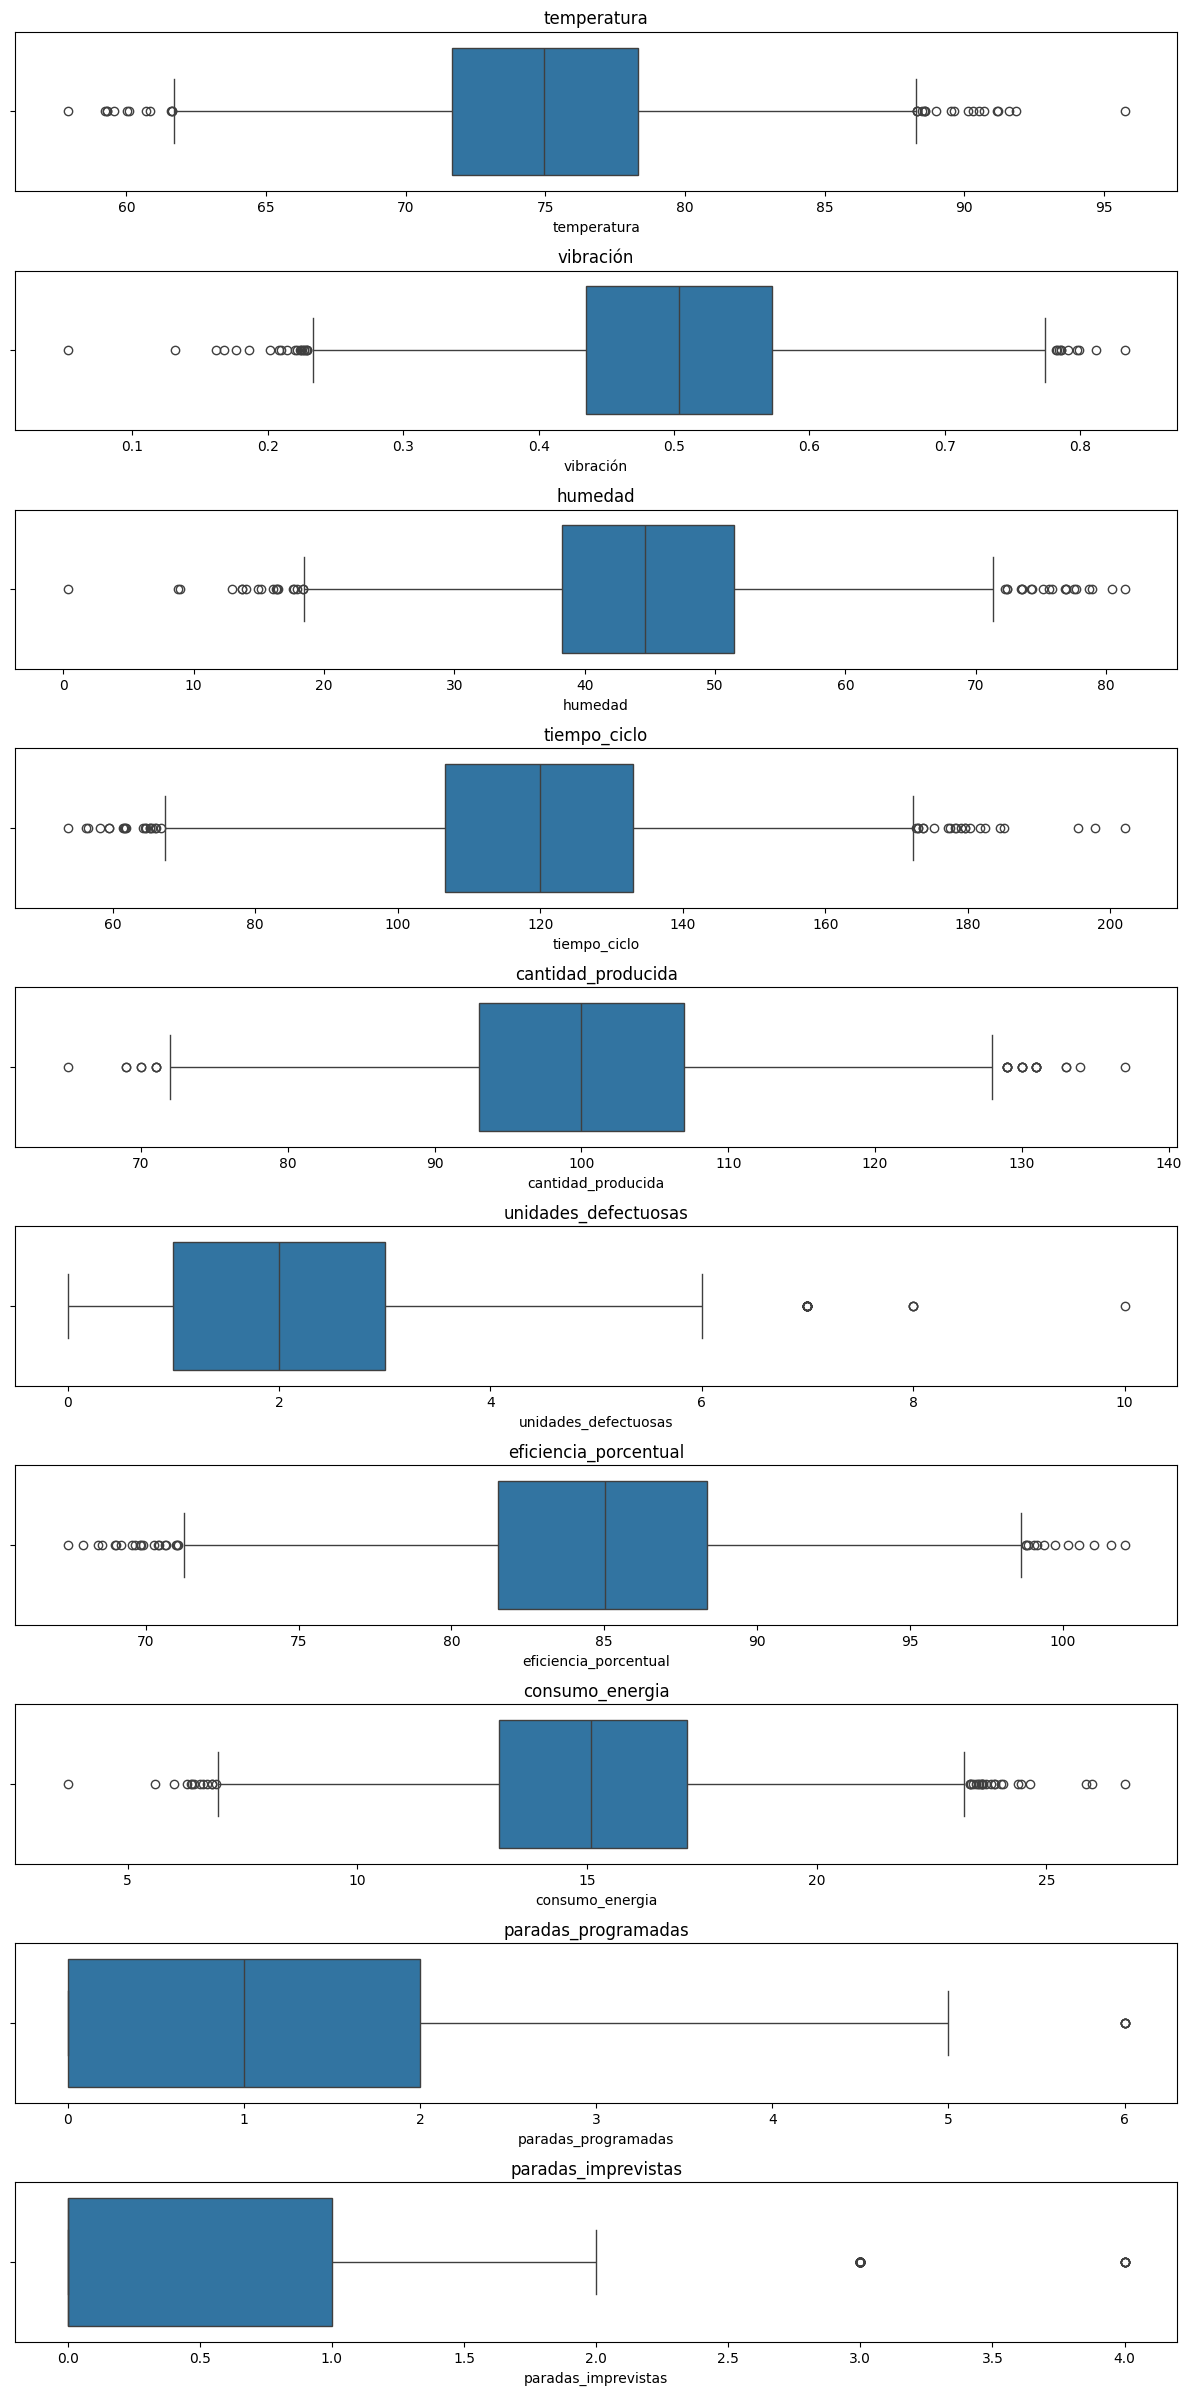

In [69]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = ['temperatura', 'vibración', 'humedad', 'tiempo_ciclo',
       'cantidad_producida', 'unidades_defectuosas', 'eficiencia_porcentual',
       'consumo_energia', 'paradas_programadas', 'paradas_imprevistas']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(15,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=dataset, ax=ax[i])
    ax[i].set_title(col)

# Analisis de los graficos de caja y bigotes:



* Temperatura: Podemos observar que la media esta en 75 y que la mayoria de los datos oscila entre 70 y 80. hay datos que estan fuera del rango de los bigotes, al tratarse de distintos equipos no podemos inferir un fallo simplemente guiandonos por la temperatura, ya que hay ciertos que pueden trabajar a distintas temperatuiras. Mas sin embargo podemos apreciar que hay un caso puntual de temperaturas elevadas excediendo los 95, este es un caso de analisis ya que podria representar un fallo.

* Vibracion: Vemos que los datos la media es aprox 0.5 y la mayoria de estos oscilan entre 0.4 y 0.6, vemos que hay datos fuera del rango de los bigotes, cuando se pasa de 0.7 podemos deducir que son equipos que estan vibrando fuera de lo normal por lo tanto son casos de estudio ya que son propensos a fallas. Hay un dato en concreto que es atipico ya que presenta una vibracion muy pero muy baja, posiblemente un error de medicion por lo tanto procederemos a eliminarlo.

* humedad: Esta parte es confuza de analizar ya que no se nos da la informacion especifica de a que humedad se refiere, si del entorno o directamento de los equipos, se ve que hay datos muy atipicos, concretamente los que estan por denbajo de 10. Pero por falta de contexto los dejaremos sin eliminar, como casos de estudio.

* tiempo_ciclo: Intuimos que se refiere al ciclo de encendido, vemos que hay dispositivos en un rango atipico que posiblemente puedan presentar fallos debido a su tiempo de ciclo tan alto.

* cantidad_producido: Vemos que los outliders en este caso en su mayoria son a un aumento en la produccion, pero hay unos en concreto que se alejan mucho de la media de produccion. Son casos de analisis que nos serviran para identificar si sucedio algun fallo en estos registros.

* unidades_defectuosas: Vemos outliders muy fuera del rango que muy probablemente se deben a fallos, por lo tanto son casos de analisis que nos serviran para entrenar a nuestro modelo.

* eficiencia_porcentual: Como podemos analizar la eficiencia promedio esta en un 85% pero tambien hay muchos desbalances, ya que se puede notar outliders de perdida de eficiencia significativa, asi como outliders de subidones de eficiencia

* consumo_energia: Haciendo el analisis vemos que hay datos atipicos que estan consumiendo una energia muy por encima de la media, la media es 15 y hay unos por encima de 25, estos pueden estar teniendo fallos en consumo energetico, provocando un consumo desmesurado. Tambien vemos otro que esta consumiendo muy poco, este tambien puede presentar un fallo y es de interes para nuestro analisis.

* paradas_programadas: En paradas programadas todo esta en orden y no hay datos atipicos

* paradas_imprevistas: En las imprevistas hay casos muy pero muy atipicos que son de interes de estudio y posiblemente tengan que ver con la presencia de fallos en los dispositivios, por lo tanto no los eliminaremos y los tendremos encuenta para el modelo de prediccion.





# Eliminando vibraciones atipicas:

In [73]:
# Eliminar filas con "epworth">24
print(f'Tamaño del set antes de eliminar registros de vibracion atipica: {dataset.shape}')
dataset = dataset[dataset['vibración']> 0.1]
print(f'Tamaño del set después de eliminar registros de vibracion atipica epworth: {dataset.shape}')

Tamaño del set antes de eliminar registros de vibracion atipica: (4991, 16)
Tamaño del set después de eliminar registros de vibracion atipica epworth: (4990, 16)


# Grafico de dispersion scatter plot

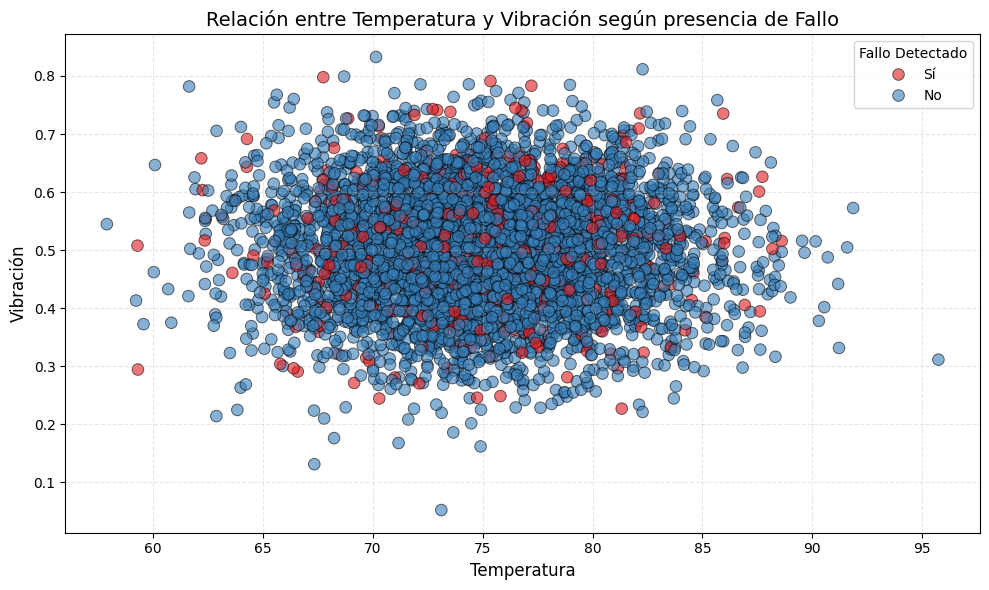

In [72]:
plt.figure(figsize=(10, 6))

# Usa un mapa de color más perceptible para distinguir clases
sns.scatterplot(
    data=dataset,
    x='temperatura',
    y='vibración',
    hue='fallo_detectado',
    palette='Set1',  # Alternativas: 'coolwarm', 'Spectral', etc.
    alpha=0.6,
    edgecolor='k',
    s=70  # Tamaño de puntos
)

plt.title('Relación entre Temperatura y Vibración según presencia de Fallo', fontsize=14)
plt.xlabel('Temperatura', fontsize=12)
plt.ylabel('Vibración', fontsize=12)
plt.legend(title='Fallo Detectado', loc='best')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Verificar errores tipograficos en variables categoricas.
Podemos primero analizar cuales son los valores unicos que tenemos en nuestras columnas del dataset, luego graficarlos y comprobar si estos valores unicos son los mismos pero escritos de otra forma o simplemente hay variaciones entre minusculas y mayusculas

In [74]:
dataset['turno'].unique()

array(['Mañana', 'Noche', 'Tarde'], dtype=object)

In [75]:
dataset['operador_id'].unique()

array(['OP_18', 'OP_5', 'OP_4', 'OP_13', 'OP_19', 'OP_2', 'OP_20',
       'OP_15', 'OP_9', 'OP_7', 'OP_6', 'OP_11', 'OP_10', 'OP_3', 'OP_17',
       'OP_16', 'OP_14', 'OP_1', 'OP_12', 'OP_8'], dtype=object)

In [76]:
dataset['maquina_id'].unique()

array(['M_8', 'M_7', 'M_6', 'M_10', 'M_5', 'M_3', 'M_1', 'M_9', 'M_4',
       'M_2'], dtype=object)

In [77]:
dataset['producto_id'].unique()

array(['P_12', 'P_14', 'P_15', 'P_7', 'P_1', 'P_9', 'P_4', 'P_6', 'P_11',
       'P_3', 'P_10', 'P_13', 'P_8', 'P_5', 'P_2'], dtype=object)

In [78]:
dataset['fallo_detectado'].unique()

array(['Sí', 'No'], dtype=object)

Podemos concluir que no hay errores tipograficos o mismas variables pero escritas de otra forma, es decir redundancias.

De momento podemos ver que no hay valores unicos lo cuales necesiten ser unificados, pero vamos a observarlo a traves de graficos para confimar que no hay necesidad de unificar valores categoricos entre si.

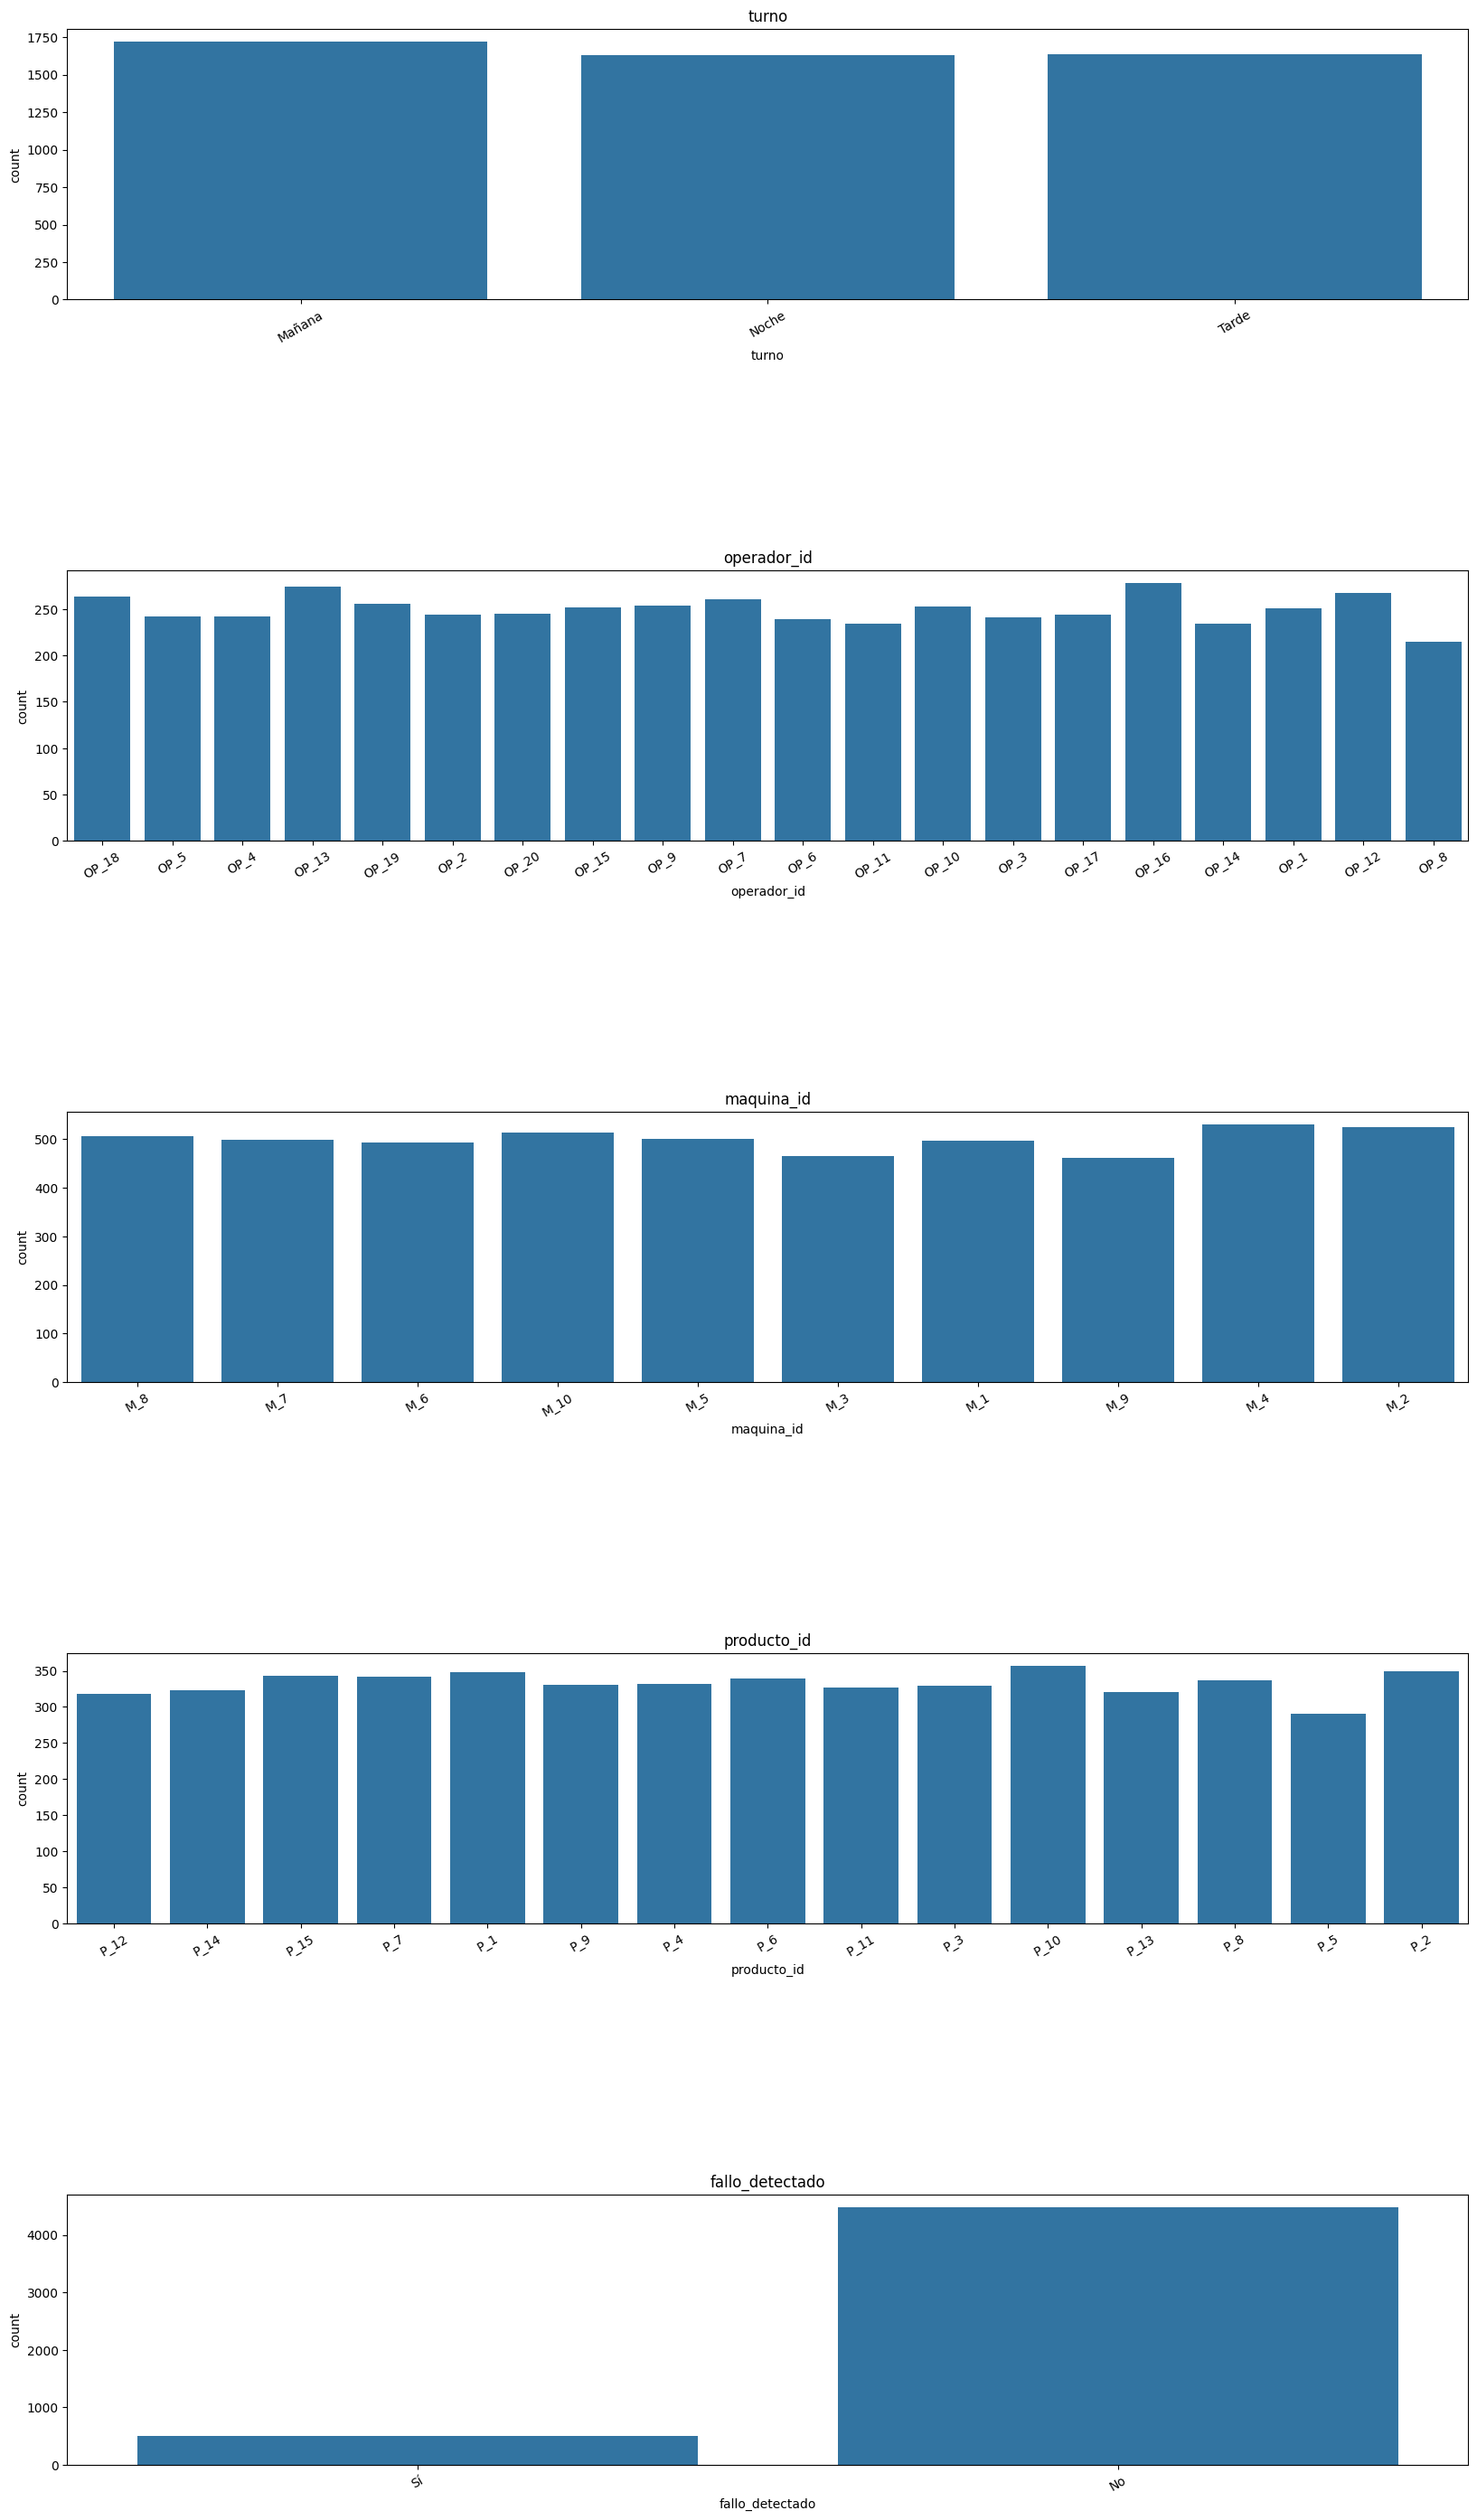

In [79]:
# Graficar los subniveles de cada variable categórica
cols_cat = ['turno','operador_id', 'maquina_id', 'producto_id', 'fallo_detectado']

fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(20,35))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=dataset, ax=ax[i])
  ax[i].set_title(col)
  ax[i].tick_params(axis='x', rotation=30)

Como vemos no hay ningun valor que necesite ser unificado.

Ya por ultimo vamos a verificar de que tamaño quedó nuestro dataset luego de la limpieza que hicimos.

In [80]:
dataset.shape

(4990, 16)

Podemos que pasamos de (6000, 18) a (4990, 16), es decir que reducimos 1010 filas y 2 columnas

Y esto es todo ya tenemos un dataset completamente limpio y con los datos que necesitamos para aplicar nuestro maching learning sobre el. El ultimo paso es guardarlo en nuestra ruta para luego usarlo:

In [81]:
# Ruta
ruta = '/content/drive/MyDrive/DATASET/dataset_limpio.csv'
# Guardar el dataset sin incluir los índices
dataset.to_csv(ruta, index=False)
print(f'Dataset limpio guardado en {ruta}')

Dataset limpio guardado en /content/drive/MyDrive/DATASET/dataset_limpio.csv


# Machine learning

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Cargar el dataset
ruta_csv = '/content/drive/MyDrive/DATASET/dataset_limpio.csv'
df = pd.read_csv(ruta_csv)

# Variables
categorical_cols = ['turno', 'operador_id', 'maquina_id', 'producto_id']
feature_cols = ['temperatura', 'vibración', 'humedad', 'tiempo_ciclo',
                'turno', 'operador_id', 'maquina_id', 'producto_id',
                'paradas_programadas', 'paradas_imprevistas']
target_col = 'fallo_detectado'
salida_csv = '/content/drive/MyDrive/DATASET/dataset_con_probabilidades.csv'

# Codificar variables categóricas
df_encoded = df.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Separar variables de entrada y objetivo
X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Evaluación
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

# Añadir la predicción de probabilidad al DataFrame original
df['probabilidad_fallo'] = modelo.predict_proba(X)[:, 1] * 100

# Guardar con probabilidades
df.to_csv(salida_csv, index=False)
print("Archivo guardado con probabilidades en:", salida_csv)


              precision    recall  f1-score   support

          No       0.91      1.00      0.95      1366
          Sí       0.00      0.00      0.00       131

    accuracy                           0.91      1497
   macro avg       0.46      0.50      0.48      1497
weighted avg       0.83      0.91      0.87      1497

Archivo guardado con probabilidades en: /content/drive/MyDrive/DATASET/dataset_con_probabilidades.csv
